## Class : DSC630-T301 Predictive Analytics (2243-1)
## Name : Rajib Samanta
### Assignment 4.2 : Week 4
You will be using the dataset als_data.csv to apply clustering methods for this assignment. This data gives anonymized data on ALS patients. With this data, complete the following steps:
1. Remove any data that is not relevant to the patient’s ALS condition.
2. Apply a standard scalar to the data.
3. Create a plot of the cluster silhouette score versus the number of clusters in a K-means cluster.
4. Use the plot created in (3) to choose on optimal number of clusters for K-means. Justify your choice.
5. Fit a K-means model to the data with the optimal number of clusters chosen in part (4).
6. Fit a PCA transformation with two features to the scaled data.
7. Make a scatterplot the PCA transformed data coloring each point by its cluster value.
8. Summarize your results and make a conclusion.
You can use R or Python to complete this assignment. Submit your code and output to the submission link. Make sure to add comments to all of your code and to document your steps, process, and analysis.

In [36]:
# Load the Libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [37]:
# 1. Load the dataset as a Pandas data frame.
# 2. Display the first ten rows of data.
# Read  anonymized data on ALS patients  data file ('als_data.csv') from local:
directory = '/Users/rajibsamanta/Documents/Rajib/College/Sem 7 Winter 2023/Week4' 
# Set the working directory
os.chdir(directory)
print(os.getcwd())
dataset1_csv = pd.read_csv("als_data.csv")
dataset1_csv.head(5)
# Display the DataFrame 10 rows

/Users/rajibsamanta/Documents/Rajib/College/Sem 7 Winter 2023/Week4


,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,...,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,1,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,...,143.0,0.017422,533,8,7.0,7,0.002646,6.0,6.0,6.0
1,2,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,...,136.0,0.010453,649,8,7.0,5,0.005386,7.0,5.0,5.0
2,3,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,...,140.0,0.008929,1234,5,0.0,0,0.008929,6.0,5.0,5.0
3,4,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,...,138.0,0.012469,2492,5,5.0,3,0.004988,7.0,6.0,5.0
4,5,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,...,138.0,0.008292,2956,6,4.0,1,0.008489,6.0,5.0,5.0


##### 1. Remove any data that is not relevant to the patient’s ALS condition.

In [38]:
# 1. Remove any data that is not relevant to the patient’s ALS condition.
# Identify and remove irrelevant columns
columns_to_remove = ['ID', 'SubjectID']  # Replace with the actual column names to be removed
dataset1_csv = dataset1_csv.drop(columns=columns_to_remove, errors='ignore')

# Display the DataFrame after removing irrelevant data
print("\nDataFrame after removing irrelevant data:")
print(dataset1_csv.head())


DataFrame after removing irrelevant data:
   Age_mean  Albumin_max  Albumin_median  Albumin_min  Albumin_range  \
0        65         57.0            40.5         38.0       0.066202   
1        48         45.0            41.0         39.0       0.010453   
2        38         50.0            47.0         45.0       0.008929   
3        63         47.0            44.0         41.0       0.012111   
4        63         47.0            45.5         42.0       0.008292   

   ALSFRS_slope  ALSFRS_Total_max  ALSFRS_Total_median  ALSFRS_Total_min  \
0     -0.965608                30                 28.0                22   
1     -0.921717                37                 33.0                21   
2     -0.914787                24                 14.0                10   
3     -0.598361                30                 29.0                24   
4     -0.444039                32                 27.5                20   

   ALSFRS_Total_range  ...  Sodium_median  Sodium_min  Sodium_range

In [39]:
dataset1_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2223 entries, 0 to 2222
Data columns (total 99 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age_mean                          2223 non-null   int64  
 1   Albumin_max                       2223 non-null   float64
 2   Albumin_median                    2223 non-null   float64
 3   Albumin_min                       2223 non-null   float64
 4   Albumin_range                     2223 non-null   float64
 5   ALSFRS_slope                      2223 non-null   float64
 6   ALSFRS_Total_max                  2223 non-null   int64  
 7   ALSFRS_Total_median               2223 non-null   float64
 8   ALSFRS_Total_min                  2223 non-null   int64  
 9   ALSFRS_Total_range                2223 non-null   float64
 10  ALT.SGPT._max                     2223 non-null   float64
 11  ALT.SGPT._median                  2223 non-null   float64
 12  ALT.SG

##### 2. Apply a standard scalar to the data.

In [40]:
# 2. Apply a standard scalar to the data.
# Identify and extract all numeric columns
numeric_columns = dataset1_csv.select_dtypes(include=['number']).columns

# Extract data to be scaled
data_to_scale = dataset1_csv[numeric_columns]

# Apply Standard Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_to_scale)

# Replace the original numeric columns with the scaled data
dataset1_csv[numeric_columns] = scaled_data

# Display the DataFrame after applying Standard Scaling
print("\nDataFrame after applying Standard Scaling to all numeric columns:")
print(dataset1_csv.head())


DataFrame after applying Standard Scaling to all numeric columns:
   Age_mean  Albumin_max  Albumin_median  Albumin_min  Albumin_range  \
0  0.917137     3.089417       -1.300781    -0.866550       5.480929   
1 -0.574879    -0.622016       -1.112401    -0.553303      -0.347725   
2 -1.452535     0.924415        1.148162     1.326179      -0.507103   
3  0.741606    -0.003443        0.017880     0.073191      -0.174361   
4  0.741606    -0.003443        0.583021     0.386438      -0.573670   

   ALSFRS_slope  ALSFRS_Total_max  ALSFRS_Total_median  ALSFRS_Total_min  \
0     -0.381450         -0.318520             0.134960          0.247368   
1     -0.310907          0.998995             0.888863          0.130839   
2     -0.299769         -1.447819            -1.975969         -1.150976   
3      0.208801         -0.318520             0.285741          0.480425   
4      0.456831          0.057913             0.059570          0.014311   

   ALSFRS_Total_range  ...  Sodium_median  

##### 3. Create a plot of the cluster silhouette score versus the number of clusters in a K-means cluster.

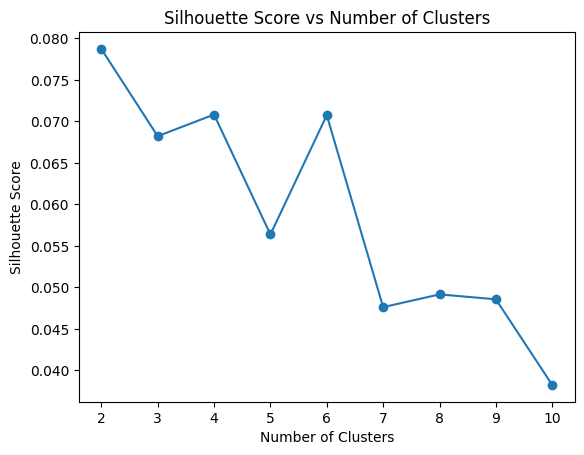

In [41]:
# 3. Create a plot of the cluster silhouette score versus the number of clusters in a K-means cluster.

# Range of cluster numbers to try
cluster_range = range(2, 11)  # considering the range 2 to 11

# List to store silhouette scores
silhouette_scores = []

# Perform K-means clustering for different numbers of clusters
for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_data)
    
    # Compute silhouette score and append to the list
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plotting the results
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

##### 4. Use the plot created in (3) to choose on optimal number of clusters for K-means. Justify your choice.
--> Using the elbow method for the "elbow" point, which is where the improvement in silhouette score starts to diminish.
7 is the optimal number of cluster.

##### 5. Fit a K-means model to the data with the optimal number of clusters chosen in part (4).

In [42]:
# 5. Fit a K-means model to the data with the optimal number of clusters chosen in part (4).

# Replace 'optimal_num_clusters' with the number we have identified from the silhouette score plot
optimal_num_clusters = 7  # Replace with determined optimal number of clusters

# Fit K-means model with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_num_clusters, random_state=42)
dataset1_csv['cluster_labels'] = kmeans.fit_predict(scaled_data)

# Display the DataFrame with cluster labels
print("DataFrame with Cluster Labels:")
dataset1_csv.head()

DataFrame with Cluster Labels:


,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,...,Sodium_min,Sodium_range,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min,cluster_labels
0,0.917137,3.089417,-1.300781,-0.866550,5.480929,-0.381450,-0.318520,0.134960,0.247368,-0.301588,...,2.300470,0.260968,1.028018,0.981832,1.715365,-0.997420,-0.880376,0.463054,1.868532,0
1,-0.574879,-0.622016,-1.112401,-0.553303,-0.347725,-0.310907,0.998995,0.888863,0.130839,0.166537,...,-0.278144,-0.489913,1.028018,0.981832,0.867032,-0.388669,0.192665,-1.137208,-0.419151,6
2,-1.452535,0.924415,1.148162,1.326179,-0.507103,-0.299769,-1.447819,-1.975969,-1.150976,-0.064100,...,1.195350,-0.654169,-0.688950,-2.280669,-1.253800,0.398249,-0.880376,-1.137208,-0.419151,5
3,0.741606,-0.003443,0.017880,0.073191,-0.174361,0.208801,-0.318520,0.285741,0.480425,-0.685524,...,0.458603,-0.272701,-0.688950,0.049689,0.018699,-0.477181,0.192665,0.463054,-0.419151,2
4,0.741606,-0.003443,0.583021,0.386438,-0.573670,0.456831,0.057913,0.059570,0.014311,-0.350529,...,0.458603,-0.722774,-0.116627,-0.416383,-0.829634,0.300598,-0.880376,-1.137208,-0.419151,6


##### 6. Fit a PCA transformation with two features to the scaled data.

In [43]:
# 6. Fit a PCA transformation with two features to the scaled data.
# Fit PCA transformation with two features
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Create a new DataFrame with the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Display the DataFrame with PCA results
print("DataFrame with PCA Results:")
pca_df.head()

DataFrame with PCA Results:


,PC1,PC2
0,-1.426768,-2.320223
1,-1.440195,-4.870052
2,1.617824,-0.430010
3,-1.919997,2.096063
4,0.297701,0.166783


##### 7. Make a scatterplot the PCA transformed data coloring each point by its cluster value.


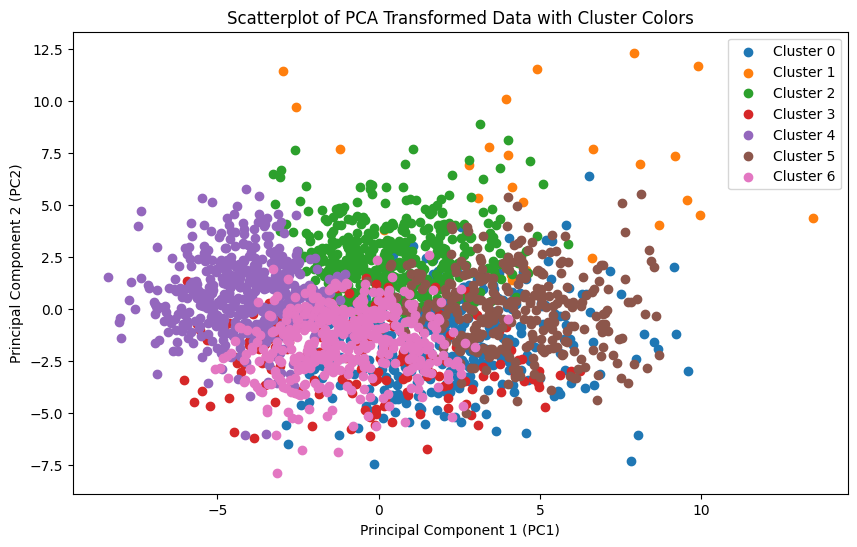

In [44]:
# 7. Make a scatterplot the PCA transformed data coloring each point by its cluster value.

pca_df['Cluster'] = dataset1_csv['cluster_labels']
# Scatterplot with cluster colors
plt.figure(figsize=(10, 6))
for cluster_label in range(optimal_num_clusters):
    cluster_data = pca_df[pca_df['Cluster'] == cluster_label]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster_label}')

plt.title('Scatterplot of PCA Transformed Data with Cluster Colors')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend()
plt.show()

In [45]:
# Count of records in each cluster
cluster_counts = dataset1_csv['cluster_labels'].value_counts()

# Display the count of records in each cluster
print("Record Count in Each Cluster:")
print(cluster_counts)

Record Count in Each Cluster:
cluster_labels
4    472
2    466
6    419
0    338
5    331
3    171
1     26
Name: count, dtype: int64


#### 8. Summarize your results and make a conclusion.
**The analysis aimed to uncover patterns and relationships within ALS patient data by combining K-means clustering and PCA. The silhouette score plot was used to determine the optimal number of clusters, and a K-means model was applied to assign cluster labels to the data. PCA was then employed to reduce the dimensionality of the data for visualization.
The scatterplot of the PCA-transformed data with cluster colors provides insights into the grouping of ALS patients based on the identified features. The visual representation aids in understanding potential clusters or patterns that may exist in the data.

Cluster 2 ,4,5,6 --> Majority of the records are under these clusters, and they are well distributed. These clusters data provide the grouping of ALS patients based the diagnosis data. Which will help to do patterns analysis.

Cluster 0 & 3 --> records are spread out across another zone. Looks like more data cleanup required or we are considering unwanted rows/columns which causing the overlapping clustering.

Cluster 1 --> There are only 26 records out of 2.2k records, These may the rare scenarios or outlier.

**Further domain-specific knowledge and additional statistical assessments may be needed to draw meaningful conclusions and insights from the clustering and dimensionality reduction results
